# CAPSTONE SPRINT 1: THE EDA

---
**Patrick Nemeth**

*Brainstation Data Science Bootcamp*

*January 26, 2024*

---



### **Exploring Roleplaying Game Player Behavior and Its Impact on Narrative Experiences in Interactive Media**

#### The Problem Area: 

This project will focus on understanding how player choices and
behaviors in role-playing games impact narrative branching and story outcomes. I will
explore roleplaying game player behavior and its impact on narrative experiences in
video games and other interactive media, as well as attempt to understand the diverse
ways in which users engage with narrative content.


#### The User: 

This project addresses challenges faced by game developers, designers,
and storytellers across various digital media. It also holds potential benefits for
consumers, offering more personalized and immersive experiences in interactive
entertainment that can adapt to individual behaviors and choices.

#### The Big Idea: 
Machine learning can be utilized to analyze player behavior data,
employing techniques like clustering for player segmentation and predictive modeling to
anticipate player actions, and Natural Language Processing can extract player
sentiment, preferences, and emotions from text documents. These techniques focus on
extracting meaningful insights from player data, which can inform both narrative and
gameplay design.

#### The Impact: 
The project aims to elevate narrative engagement in videogames and
other forms of interactive media utilizing machine learning and AI, which could
potentially increase consumer satisfaction and retention. Integrating data-driven insights
with adaptive storytelling techniques could significantly contribute to both the gaming
industry as well as broader digital narrative experiences as a whole.

#### The Data:

Split into two files (one for character descriptions and one for narrative posts), the "Deep Dungeons and Dragons Corpus" (DDDC) contains an extensive collection of narrative posts and character descriptions from various pen and paper role-playing games collected from roleplayerguild.com.  This dataset includes 56,555 entries across 1,544 unique threads, each detailed with post sequences, author information, and narrative content. It presents a terrific opportunity for exploratory data analysis and natural language processing.


---
## Data Dictionary
### DDDC.txt

| Field             | Description |
|-------------------|-------------|
| `thread_id`       | Numeric identifier for each story thread. Posts sharing the same `thread_id` are part of the same narrative thread. |
| `post_id`         | Unique identifier for each post within a thread, starting from 0. The ascending order represents the chronological sequence of the narrative. |
| `web_id`          | Post ID on the roleplayerguild.com website, used primarily for data collection purposes. |
| `author_name`     | Name of the contributor of the post. This field allows tracking of posts by the same author across different threads and links to character descriptions. |
| `author_join_time`| The time when the author joined the roleplayerguild.com website. This column is not actively used in the analysis. |
| `author_num_posts`| Total number of posts made by the author on the website. Like `author_join_time`, this column is not central to the narrative analysis. |
| `post_text`       | The actual content of the post, containing action descriptions and forming the core of the narrative data. |


### DDDC.txt.charinfo 

| Field         | Description |
|---------------|-------------|
| `thread_id`   | Numeric identifier corresponding to the thread ID in DDDC.txt. |
| `author_name` | Author's name, linking the character descriptions to their respective posts in DDDC.txt. |
| `dummy`       | A field to be ignored. |
| `char_description` | The detailed description of the character written by the author. |

---
# Exploratory Data Analysis (EDA)
In this notebook, I'll conduct an preliminary exploratory data analysis of the DDDC dataset. My focus here will be on understanding the structure of the data, identifying unique values, examining distributions, and identifying data quality issues.


#### Initial Steps: Importing Libraries and Loading Data 
Before diving into exploratory data analysis, the first step is setting up our environment with necessary Python libraries and loading the dataset into a pandas dataframe. The libraries I'll use are:
 
- `numpy`: For numerical computations.
- `pandas`: For data handling and manipulation.
- `matplotlib.pyplot`: For creating static visualizations.
- `seaborn`: For additional visualization capabilities.
- `collections.Counter`: For counting word frequencies.
- `itertools`: For flattening lists.
- `wordcloud.WordCloud`: For creating word clouds.
- `nltk.corpus.stopwords`: For removing stopwords.
- `nltk`: For natural language processing.


In [46]:
# Import required libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data handling and manipulation
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For additional visualization capabilities
from collections import Counter # For counting word frequencies
import itertools # For flattening lists
from wordcloud import WordCloud # For creating word clouds
from nltk.corpus import stopwords # For removing stopwords
import nltk # For natural language processing

# Load the "Deep Dungeons & Dragons Corpus" text file into a pandas dataframe
MASTER_POSTS = pd.read_csv('/Users/NEMETH/SCHOOL/CAPSTONE/DATA/DDDC.txt', sep='\t')  # sep='\t' is used to indicate that the data is tab-delimited

# Create a working copy of the dataframe
df_posts = MASTER_POSTS.copy()

# Add a unique index to the dataframe for ease of merging
df_posts.insert(0, 'merge_index', range(1, len(df_posts) + 1))

# Repeat for the character information data (DDDCC.txt.charinfo)
CHAR_MASTER = pd.read_csv('/Users/NEMETH/SCHOOL/CAPSTONE/DATA/DDDC.txt.charinfo', sep='\t') 
df_char = CHAR_MASTER.copy()
df_char.insert(0, 'index', range(1, len(df_char) + 1))

#### Data Exploration and Preprocessing

I'm going to begin by taking a look at the first of our two text files, `DDDC.txt`. This file contains the actual narrative posts, as well as some metadata about the posts and their authors. 

In [47]:
# Display the shape of the dataframe
print(f'There are {df_posts.shape[0]} rows and {df_posts.shape[1]} columns in the dataframe.') # use an f-string to describe the shape of the dataframe

There are 56555 rows and 8 columns in the dataframe.


The results of df_posts.shape() show us that the dataframe contains 56,555 rows and 8 columns. This aligns with the data dictionary, which tells us that each row represents a single post, with 7 columns of metadata and 1 new column of index values.

In [48]:
# Display a brief overview of the dataframe
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56555 entries, 0 to 56554
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

The columns do not appear to have names, so I'll need to assign them manually using the included data dictionary:

In [49]:
# Define the correct column names
column_names = ['index', 'thread_id', 'post_id', 'web_id', 'author_name', 'author_join_time', 'author_num_posts', 'post_text']

# Rename the columns
df_posts.columns = column_names

# Sanity check
df_posts.columns

Index(['index', 'thread_id', 'post_id', 'web_id', 'author_name',
       'author_join_time', 'author_num_posts', 'post_text'],
      dtype='object')

In [50]:
# Display the first few rows of the dataframe
df_posts.head()

,index,thread_id,post_id,web_id,author_name,author_join_time,author_num_posts,post_text
0,1,0,1,77814,card-captor,4 yrs ago,2210,Meira overheard some of the words in the argum...
1,2,0,2,78370,card-captor,4 yrs ago,2210,A lady in a red robe walked behind Meria and N...
2,3,0,3,80125,card-captor,4 yrs ago,2210,"Aira felt her skin crawl every time the word ""..."
3,4,0,4,84912,card-captor,4 yrs ago,2210,"Wonderful' Aira replied, as she walked towards..."
4,5,0,5,85279,card-captor,4 yrs ago,2210,"Oh, and where are my manners. Would you like s..."


Based on the output df.info() and df.head(), the dataframe's columns appear to be unnamed. I'll name them (referring to the data dictionary) to make them more descriptive and easier to work with:

In [51]:
# Define the correct column names
column_names = ['merge_index', 'thread_id', 'post_id', 'web_id', 'author_name', 'author_join_time', 'author_num_posts', 'post_text']

# Rename the columns
df_posts.columns = column_names

df_posts.columns

Index(['merge_index', 'thread_id', 'post_id', 'web_id', 'author_name',
       'author_join_time', 'author_num_posts', 'post_text'],
      dtype='object')

The naming of the columns was successful, and we can now see the column names in the output of df.columns.

In [52]:
# Display a brief overview of the dataframe
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56555 entries, 0 to 56554
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   merge_index       56555 non-null  int64 
 1   thread_id         56555 non-null  int64 
 2   post_id           56555 non-null  int64 
 3   web_id            56555 non-null  int64 
 4   author_name       56555 non-null  object
 5   author_join_time  56555 non-null  object
 6   author_num_posts  56555 non-null  int64 
 7   post_text         56554 non-null  object
dtypes: int64(5), object(3)
memory usage: 3.5+ MB


In [53]:
# View the first few entries to get an understanding of the dataframe's structure
df_posts.head()

,merge_index,thread_id,post_id,web_id,author_name,author_join_time,author_num_posts,post_text
0,1,0,1,77814,card-captor,4 yrs ago,2210,Meira overheard some of the words in the argum...
1,2,0,2,78370,card-captor,4 yrs ago,2210,A lady in a red robe walked behind Meria and N...
2,3,0,3,80125,card-captor,4 yrs ago,2210,"Aira felt her skin crawl every time the word ""..."
3,4,0,4,84912,card-captor,4 yrs ago,2210,"Wonderful' Aira replied, as she walked towards..."
4,5,0,5,85279,card-captor,4 yrs ago,2210,"Oh, and where are my manners. Would you like s..."


In [54]:
# Display the last few rows of the dataframe
df_posts.tail()

,merge_index,thread_id,post_id,web_id,author_name,author_join_time,author_num_posts,post_text
56550,56551,1543,117,3823645,rekaigan,2 yrs ago,1054,Rahna Altema#@##@#She watched as the mushroom ...
56551,56552,1543,118,3856743,tombprince,2 yrs ago,290,"http://i.imgur.com/Aum6ALB.jpg Blin ""Brytag"" A..."
56552,56553,1543,119,3857181,tex,3 yrs ago,2975,Gaius Stronurr#@#The Forest Floor#@#Gaius was ...
56553,56554,1543,120,3866313,mokley,3 yrs ago,2198,"Fall? I crashed actually. oh crap, my gear. We..."
56554,56555,1543,121,3874671,tombprince,2 yrs ago,290,"http://i.imgur.com/Aum6ALB.jpg Blin ""Brytag"" A..."


In [55]:
# Using `df.sample()` To get a broader and potentially more accurate picture of the dataframe
df_posts.sample(25)

,merge_index,thread_id,post_id,web_id,author_name,author_join_time,author_num_posts,post_text
54454,54455,1484,16,2805561,medjedovic,2 yrs ago,520,The summoning awoke him form his slumber. Real...
54550,54551,1487,7,518209,skye-autumn,17 Jan 2014 23:26,33,"As Verin speaks up, James turns his focus of a..."
37798,37799,1036,27,3064354,guess-who,3 yrs ago,2703,"Ooh, you're a big girl aren't ya'? Ryan said n..."
36033,36034,982,4,4488987,kazemitsu,5 mos ago,351,Kaze#@#At the sound of the door opening to his...
332,333,5,26,4210626,liotrent,1 yr ago,397,Utah hasn't even flinched from her original po...
19396,19397,579,26,4224758,lissalu,2 yrs ago,244,Shaali Tunn#@##@#http://data.whicdn.com/images...
723,724,13,160,2946230,billsomething,2 yrs ago,1247,He wanted to avoid anymore fighting he really ...
16422,16423,473,53,4274115,peaceless,3 yrs ago,503,It was perfect. Kiril's voice sounded from the...
39447,39448,1061,1,367659,cidthekid,16 Jan 2014 22:50,355,"Karen walked through Lavender town, Jigglypuff..."
3531,3532,81,5,2693791,strafe,2 yrs ago,82,"Quite nippy this evening, Edward would say. He..."


For the purposes of this preliminary analysis, I'll focus on the following columns: `thread_id`, `post_id`, `author_name`, and `post_text`.  `web_id`, `author_join_time`, and `author_num_posts` are not central to narrative analysis and will be dropped from the dataframe.

In [56]:
# Drop unnecessary columns
df_posts = df_posts.drop(columns=['web_id', 'author_join_time', 'author_num_posts'])

# Sanity check
df_posts.head()


,merge_index,thread_id,post_id,author_name,post_text
0,1,0,1,card-captor,Meira overheard some of the words in the argum...
1,2,0,2,card-captor,A lady in a red robe walked behind Meria and N...
2,3,0,3,card-captor,"Aira felt her skin crawl every time the word ""..."
3,4,0,4,card-captor,"Wonderful' Aira replied, as she walked towards..."
4,5,0,5,card-captor,"Oh, and where are my manners. Would you like s..."


In [57]:
# Check for missing values
print(df_posts.isnull().sum())

merge_index    0
thread_id      0
post_id        0
author_name    0
post_text      1
dtype: int64


In [58]:
# Display the row with the missing 'post_text' value
df_posts[df_posts['post_text'].isnull()]


,merge_index,thread_id,post_id,author_name,post_text
32518,32519,888,1,polybius,NaN


In [59]:
# filter for thread_id 888
df_posts[df_posts['thread_id'] == 888]



,merge_index,thread_id,post_id,author_name,post_text
32517,32518,888,0,polybius,1888#@#The Story of Hurston Macabre#@#Welcome ...
32518,32519,888,1,polybius,NaN


I think it's safe to drop this single row

In [60]:
# Drop row with missing 'post_text' value
df_posts = df_posts.dropna(subset=['post_text'])

In [61]:
# Sanity check
print(df_posts.isnull().sum())

df_posts.shape

merge_index    0
thread_id      0
post_id        0
author_name    0
post_text      0
dtype: int64


(56554, 5)

I have removed the single null value from the dataframe, and the new shape of the dataframe is 56,554 rows and 5 columns.

In [62]:
# Check for duplicate rows
df_posts.duplicated().sum()

0

In [63]:
df_posts.dtypes

merge_index     int64
thread_id       int64
post_id         int64
author_name    object
post_text      object
dtype: object

In [64]:
# Display a brief overview of the dataframe
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56554 entries, 0 to 56554
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   merge_index  56554 non-null  int64 
 1   thread_id    56554 non-null  int64 
 2   post_id      56554 non-null  int64 
 3   author_name  56554 non-null  object
 4   post_text    56554 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.6+ MB


In [65]:
# Use `df.sample()` to get a broader picture of the dataframe
df_posts.sample(15)

,merge_index,thread_id,post_id,author_name,post_text
35766,35767,977,43,undine,http://fontmeme.com/embed.php?text=Ashton%20Br...
30802,30803,846,71,midna-phobia,"South looked up, her eyes widening when she sa..."
22253,22254,641,39,fairess,Alexis’ face distorted into disgust as the thi...
30762,30763,846,31,apollosarcher,"Carolina had been up early, nightmares had kep..."
42751,42752,1174,7,marsadept,Jack tossed the talking cheese back onto his p...
42870,42871,1177,16,caits,"Lily nodded, eating her lunch hurriedly as Ang..."
51736,51737,1399,1,lord-wraith,http://blogs-images.forbes.com/erikkain/files/...
44902,44903,1225,28,azura,"After the door closed, Mitsukuni heard a click..."
7044,7045,195,24,travesty,There weren't much to be said after everyone i...
37281,37282,1018,1,gentlemanvaultboy,"It's lovely outside, wouldn't you agree Darwin..."


looks like we have a clean dataset!

Repeat for the character information data 'df_char'




In [66]:
# Display the shape of the dataframe
print(f'There are {df_char.shape[0]} rows and {df_char.shape[1]} columns in the dataframe.') # use an f-string to describe the shape of the dataframe

There are 9770 rows and 5 columns in the dataframe.


The results of df_char.shape() show that the dataframe contains 9770 rows and 5 columns. This dataframe has a significantly smaller number of rows than df_posts, which I will need to keep in mind if merging the two dataframes later on.

In [67]:
# Display a brief overview of the dataframe
df_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9770 entries, 0 to 9769
Data columns (total 5 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Once again, the columns do not appear to have names, so I'll reference the data dictionary to assign them manually:

In [68]:
# Define the correct column names
char_column_names = ['merge_index', 'thread_id', 'author_name', 'dummy', 'char_description']

# Rename the columns
df_char.columns = char_column_names

# Sanity check
df_char.columns

Index(['merge_index', 'thread_id', 'author_name', 'dummy', 'char_description'], dtype='object')

In [69]:
# Display a brief overview of the dataframe
df_char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9770 entries, 0 to 9769
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   merge_index       9770 non-null   int64 
 1   thread_id         9770 non-null   int64 
 2   author_name       9770 non-null   object
 3   dummy             9770 non-null   int64 
 4   char_description  9770 non-null   object
dtypes: int64(3), object(2)
memory usage: 381.8+ KB


In [70]:
# View the first few entries to get an understanding of the dataframe's structure
df_char.head()

,merge_index,thread_id,author_name,dummy,char_description
0,1,1,hylianrose,0,"Name: Elaine ""Lain"" Cross#@#Age: 15#@#Gender: ..."
1,2,1,kazemitsu,0,Name: Kaze#@#Age: 18#@#Appearance:#@#Kaze is a...
2,3,1,drakey,0,Name: Eira Luters#@#Age: 17#@#Appearance (pict...
3,4,1,dutchess-sarah,0,Name: Sarah James#@#Age: 15#@#Gender: Female#@...
4,5,1,aphelion,0,"#@#Name#@#Luxianne ""Lucky"" Soles#@#Age#@#16#@#..."


the results of df_char.head() reveals a discrepancy between the two text files ('DDDC.txt' and 'DDDC.txt.charinfo') The first dataset's 'thread_id' column begins numbering from 0, while the second starts from 1. I've decided to postpone addressing this issue until a more thorough EDA is conducted. This will allow for a better understanding of the two datasets' structures and make sure that any changes made to the 'thread_id' column are based on a more thorough analysis

In [71]:
# Display the last few rows of the dataframe
df_char.tail()

,merge_index,thread_id,author_name,dummy,char_description
9765,9766,1543,lostbrothergrimm,0,#@#NAME: Eli Wyn#@#- Age: 17#@#- Height: 5'8''...
9766,9767,1543,shylarah,0,Name: Nikkolaira “Nikki” Wyatt#@#Abstract: fri...
9767,9768,1543,alina13,0,NAME: Eden Audrey#@#ABSTRACT: Pampered rich gi...
9768,9769,1543,tex,0,NAME:#@#Gaius Stronurr (Straw-Neeur)#@#~ABSTRA...
9769,9770,1543,mokley,0,art by John Thacker#@#http://i.imgur.com/YX0XK...


In [72]:
# Using `df.sample()` To get a broader and potentially more accurate picture of the dataframe
df_char.sample(25)

,merge_index,thread_id,author_name,dummy,char_description
3705,3706,601,framing-a-moose,0,#@##@#Lilac Diana Rider#@##@#http://www.modern...
5458,5459,866,seravee,0,Name: Wren Locken#@#Year of Education: Graduat...
6622,6623,1045,rainbowfactory,0,Name: Juliet Westerhouse#@#Nickname: Julie#@#G...
4815,4816,772,candlelitcraft,0,Name: Alvina Garnett#@#Alias: Azure#@#Gender: ...
6568,6569,1036,nafasi,0,Name: River#@#Age: 24#@#Gender: Female#@#Appea...
3570,3571,581,kaijubaragon,0,#@#Bruno Žurančić#@#https://i.imgur.com/AP6Kcz...
431,432,67,leonvon,0,Name: Artificial Navigation and Defense Intell...
959,960,153,knifeman,0,#@#Birth Name: Jarod Zachary Veillon#@#Alliase...
5752,5753,918,ninian,0,Celes Elwyn#@#http://i.imgur.com/FqRFpEE.png#@...
4593,4594,737,herecomesthesnow,0,Name: Karasawa Shinjiro (Shinji works)#@#Alias...


The data dictionary specifies that the 'dummy' column should be ignored, so I'll explore it's contents before dropping it from the dataframe:

In [73]:
# Check the number of unique values in the 'dummy' column

print(f"Number of unique values in the 'dummy' column: {df_char['dummy'].nunique()}")


Number of unique values in the 'dummy' column: 1


looks like it's safe to drop this column

In [74]:
# Drop the 'dummy' column
df_char = df_char.drop(columns=['dummy'])

# Sanity check
df_char.head()

,merge_index,thread_id,author_name,char_description
0,1,1,hylianrose,"Name: Elaine ""Lain"" Cross#@#Age: 15#@#Gender: ..."
1,2,1,kazemitsu,Name: Kaze#@#Age: 18#@#Appearance:#@#Kaze is a...
2,3,1,drakey,Name: Eira Luters#@#Age: 17#@#Appearance (pict...
3,4,1,dutchess-sarah,Name: Sarah James#@#Age: 15#@#Gender: Female#@...
4,5,1,aphelion,"#@#Name#@#Luxianne ""Lucky"" Soles#@#Age#@#16#@#..."


In [75]:
# Check for missing values
print(df_char.isnull().sum())

merge_index         0
thread_id           0
author_name         0
char_description    0
dtype: int64


In [76]:
# Check for duplicate rows
df_char.duplicated().sum()

0

In [77]:
df_char.dtypes

merge_index          int64
thread_id            int64
author_name         object
char_description    object
dtype: object

looks clean! let's export both cleaned dataframes to use in the next notebook

In [78]:
# Exporting the cleaned posts dataframe
df_posts.to_csv('/Users/NEMETH/SCHOOL/CAPSTONE/DATA/cleaned_posts.csv', index=False)

# Exporting the cleaned character information dataframe
df_char.to_csv('/Users/NEMETH/SCHOOL/CAPSTONE/DATA/cleaned_characters.csv', index=False)


# EDA

In [79]:
# Create a new dataframe containing only the numerical columns for ease of analysis
df_posts_numeric = df_posts.select_dtypes(include=['int64', 'float64'])

# display the first few rows of the new dataframe
df_posts_numeric.head()


,merge_index,thread_id,post_id
0,1,0,1
1,2,0,2
2,3,0,3
3,4,0,4
4,5,0,5


In [80]:
df_posts_numeric[['merge_index', 'thread_id', 'post_id']].describe()


,merge_index,thread_id,post_id
count,56554.000000,56554.000000,56554.000000
mean,28277.925010,780.095572,59.416894
std,16326.301177,439.704519,86.357845
min,1.000000,0.000000,0.000000
25%,14139.250000,412.000000,10.000000
50%,28277.500000,788.000000,28.000000
75%,42416.750000,1163.000000,72.000000
max,56555.000000,1543.000000,752.000000


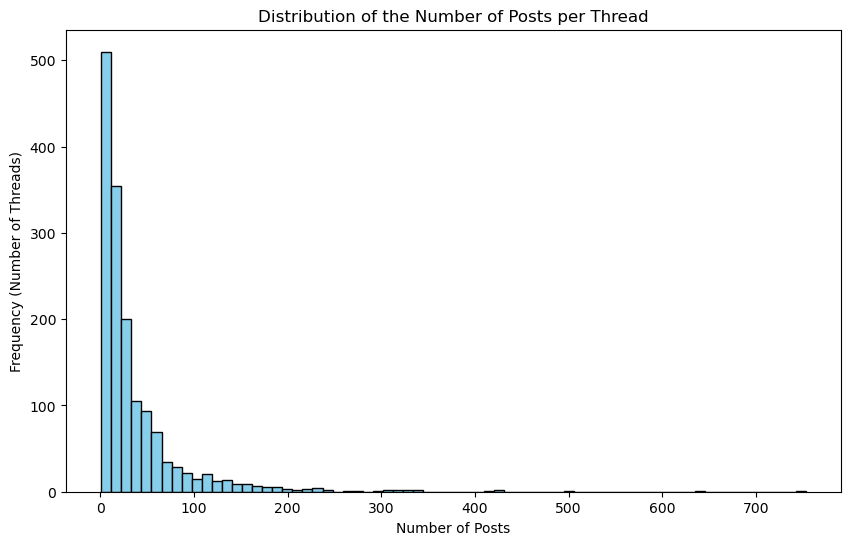

In [81]:
# Count the number of posts in each thread
posts_per_thread = df_posts['thread_id'].value_counts()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(posts_per_thread, bins=70, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of the Number of Posts per Thread')
plt.xlabel('Number of Posts')
plt.ylabel('Frequency (Number of Threads)')

# Show the plot
plt.show()


let's zoom in on threads with up to 200 posts:

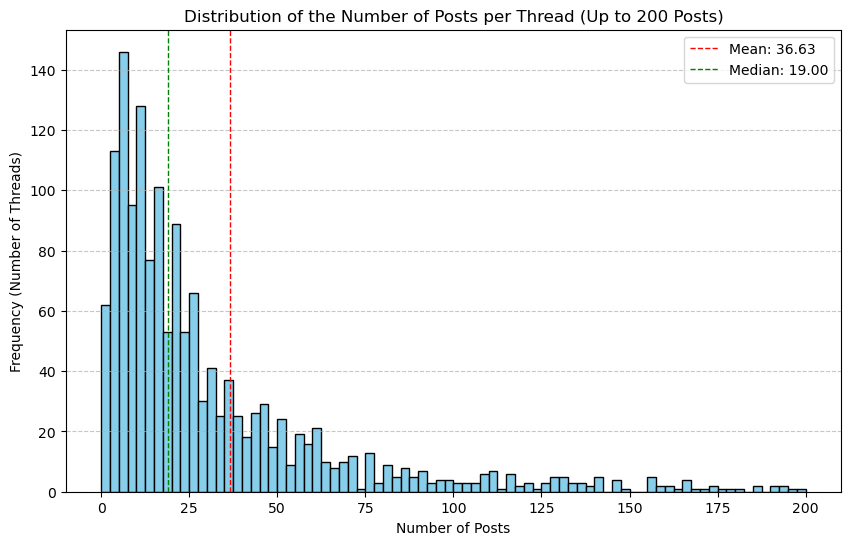

In [82]:
# Calculate the mean and median values

mean_val = np.mean(posts_per_thread)
median_val = np.median(posts_per_thread)


plt.figure(figsize=(10, 6))

# Create a histogram focused on the range of interest
plt.hist(posts_per_thread, bins=80, color='skyblue', edgecolor='black', range=(0, 200))
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}') 
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.title('Distribution of the Number of Posts per Thread (Up to 200 Posts)')
plt.xlabel('Number of Posts')
plt.ylabel('Frequency (Number of Threads)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [83]:
Q1 = df_posts_numerical['post_id'].quantile(0.25) # define the first quartile
Q3 = df_posts_numerical['post_id'].quantile(0.75) # define the third quartile
IQR = Q3 - Q1 # calculate the interquartile range
outliers = df_posts_numerical[(df_posts_numerical['post_id'] < (Q1 - 1.5 * IQR)) | (df_posts_numerical['post_id'] > (Q3 + 1.5 * IQR))]  # filter for outliers

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the results
num_outliers


4728

In [84]:
# Group by 'thread_id' and count unique 'author_name' entries for each thread
authors_per_thread = df_posts.groupby('thread_id')['author_name'].nunique()

# Descriptive statistics for the number of authors per thread
authors_stats = authors_per_thread.describe()

# Display the statistics
authors_stats



count    1544.000000
mean        6.328368
std         3.586042
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        24.000000
Name: author_name, dtype: float64

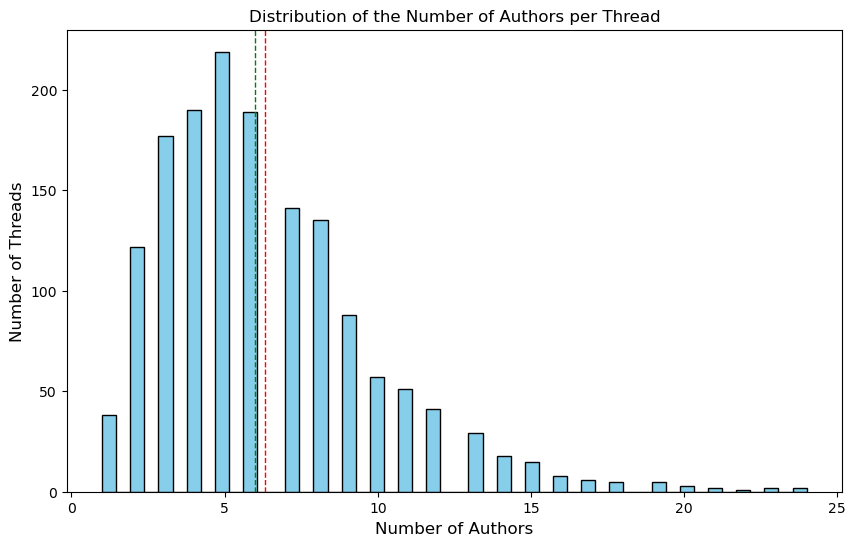

In [85]:

# Calculate mean and median
mean_authors = authors_per_thread.mean()
median_authors = authors_per_thread.median()

# Group by 'thread_id' and count unique 'author_name' entries for each thread
authors_per_thread = df_posts.groupby('thread_id')['author_name'].nunique()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(authors_per_thread, bins=50, color='skyblue', edgecolor='black')

# Add a vertical line for the mean and median
plt.axvline(mean_authors, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_authors:.2f}')
plt.axvline(median_authors, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_authors:.2f}')

# Add titles and labels
plt.title('Distribution of the Number of Authors per Thread')
plt.xlabel('Number of Authors', fontsize=12)
plt.ylabel('Number of Threads', fontsize=12)

# Show the plot
plt.show()


most active authors

In [86]:
# Count the number of posts made by each author
author_post_counts = df_posts['author_name'].value_counts()

# Display the top 10 most active authors
most_active_authors = author_post_counts.head(10)
print("Most Active Authors:")
print(most_active_authors)


Most Active Authors:
author_name
vancexentan       540
caits             483
eklispe           338
rune_alchemist    308
jangel13          300
raijinslayer      280
polaris-north     278
zarkun            271
card-captor       243
kol               237
Name: count, dtype: int64


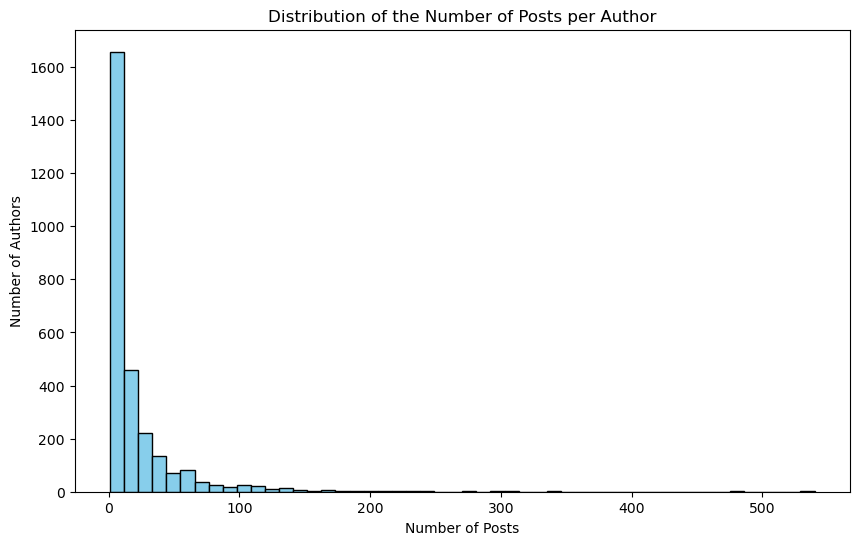

In [87]:
# Create a histogram for the distribution of the number of posts per author
plt.figure(figsize=(10, 6))
plt.hist(author_post_counts, bins=50, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of the Number of Posts per Author')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Authors')

# Show the plot
plt.show()


posts

In [88]:
# Total word count
df_posts['word_count'] = df_posts['post_text'].apply(lambda x: len(str(x).split())) # split the text into words and count them using a lambda function
total_words = df_posts['word_count'].sum() # sum the word counts
print(f"Total number of words: {total_words}") # print the result

# Average word count per post
average_words_per_post = df_posts['word_count'].mean()

# Print the result
print(f"Average number of words per post: {average_words_per_post:.2f}")


Total number of words: 24925938
Average number of words per post: 440.75


In [89]:
# Split post texts into individual words
post_words = df_posts['post_text'].apply(lambda x: str(x).split()) # split the text into words using a lambda function

# Flatten the list of words and count occurrences
all_words = list(itertools.chain(*words)) # using itertools.chain() to flatten the list of words
word_counts = Counter(all_words) # count the occurrences of each word

# Display 10 most common words
common_words = word_counts.most_common(10)
print("Most common words:")
print(common_words)


Most common words:
[('the', 1259192), ('to', 788362), ('a', 573575), ('and', 553353), ('of', 515977), ('was', 408782), ('he', 314676), ('his', 310215), ('her', 298130), ('in', 285071)]


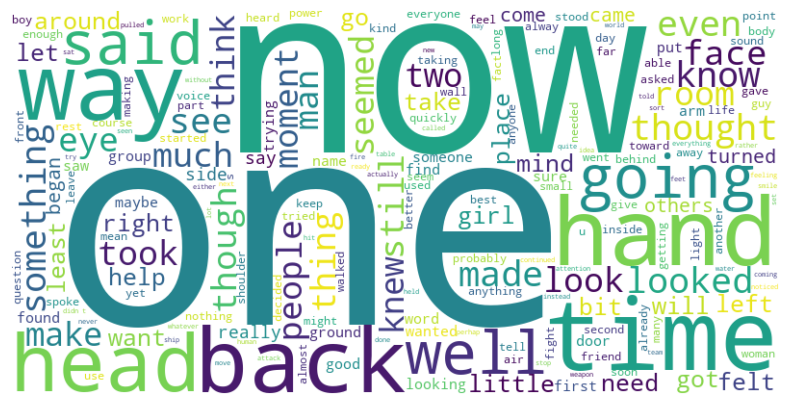

In [90]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words)) 

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


And now, for df_char:

In [91]:
df_char.head()

,merge_index,thread_id,author_name,char_description
0,1,1,hylianrose,"Name: Elaine ""Lain"" Cross#@#Age: 15#@#Gender: ..."
1,2,1,kazemitsu,Name: Kaze#@#Age: 18#@#Appearance:#@#Kaze is a...
2,3,1,drakey,Name: Eira Luters#@#Age: 17#@#Appearance (pict...
3,4,1,dutchess-sarah,Name: Sarah James#@#Age: 15#@#Gender: Female#@...
4,5,1,aphelion,"#@#Name#@#Luxianne ""Lucky"" Soles#@#Age#@#16#@#..."


In [92]:
# Total word count for character descriptions
df_char['word_count'] = df_char['char_description'].apply(lambda x: len(str(x).split())) # split the text into words and count them using a lambda function
total_words = df_char['word_count'].sum() # sum the word counts
print(f"Total number of words: {total_words}") # print the result

# Average word count per character description
average_words_per_char = df_char['word_count'].mean()
print(f"Average number of words per character description: {average_words_per_char:.2f}")


Total number of words: 8311570
Average number of words per character description: 850.72


In [93]:
# Split the character description text into individual words
char_words = df_char['char_description'].apply(lambda x: str(x).split()) # split the text into words using a lambda function

# Flatten the list of words and count occurrences
all_words = list(itertools.chain(*words)) # using itertools.chain() to flatten the list of words
word_counts = Counter(all_words) # count the occurrences of each word

# Display the 10 most common words
common_words = word_counts.most_common(10)
print("Most common words:")
print(common_words)

Most common words:
[('the', 1259192), ('to', 788362), ('a', 573575), ('and', 553353), ('of', 515977), ('was', 408782), ('he', 314676), ('his', 310215), ('her', 298130), ('in', 285071)]


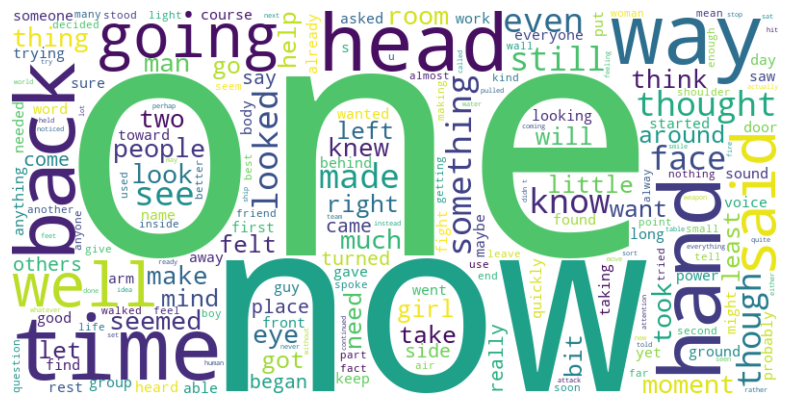

In [94]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Next Steps for Analysis:

Further explore the relationship between the two datasets, possibly merging them

Feature Engineering: Deeper Dive into Text Data, extracting specific information from char_description and post_text using the NLP techniques we will cover in class such as Sentiment analysis, topic modeling, or even character analysis

Model Building: selecting features, encoding categorical variables, and splitting the dataset into training and test sets.

